# SymPy

SymPy is a python module that provides powerful CAS (Computer Algebra Systems) features. To get started using SumPy in a Python program, import the module sympy:

In [1]:
from sympy import *

To get nice-looking latex formatted output run:

In [2]:
init_printing()

## Symbolic Variables

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the `Symbol` class:

In [3]:
x = Symbol('x')

In [4]:
(pi + x)**2

In [5]:
# Alternative way of defining symbols
a, b, c = symbols('a, b, c')

We can add assumptions to symbols when we create them:

In [6]:
x = Symbol('x', real=True)
x.is_imaginary

False

In [7]:
x = Symbol('x', positive=True)
x > 0

### Complex numbers

The imaginary unit is denoted `I` in Sympy

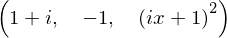

In [8]:
1+1*I, I**2, (x * I + 1)**2

### Rational Numbers

There are three different numerical types in SymPy: `Real`, `Rational` and `Integer`:

In [9]:
r1 = Rational(4, 5)
r2 = Rational(5, 4)

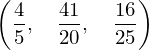

In [10]:
r1, r1+r2, r1/r2

## Numerical evaluation

SymPy uses a library for arbitrary precision as its numerical backend, and has predefined SymPy expression for a number of mathematical constants, such asL `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an arguments `n` which specifies the number of significant digits.

In [11]:
pi.evalf(n=50)

In [12]:
y = (x + pi)**2

In [13]:
N(y, 5) # Same as evalf

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [14]:
y.subs(x, 1.5)

In [15]:
N(y.subs(x, 1.5))

The `subs` function can of course alse be used to substitute Symbols and expressions:

In [16]:
y.subs(x, a+pi)

We can also combine numerical evolution of expression with NumPy arrays

In [17]:
import numpy as np

x_vec = np.arange(0, 10, 0.1)
y_vec = np.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

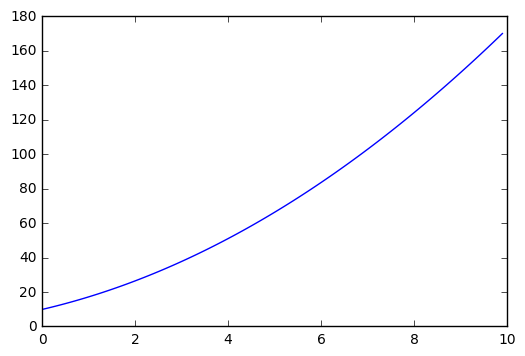

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

However, this kind of numerical evolution can be very slow, and there is a much more efficient way to do it. Use the function `lambdify` to "compile" a SymPy expression into a function that is much more effecient to evaluate numerically:

In [19]:
# The first argument is a list of variables that f 
# will be a function of: in this case only x -> f(x)
f = lambdify([x], (x + pi)**2, 'numpy')

# Now we directly pass a numpy array and f(x) is efficiently evaluated
y_vec = f(x_vec)

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude (even in this simple example)

## Algebraic manipulations

One of the main uses of an CAS is to perform algebraic manipulations of expressions. For example, we might want to expand a product, factor an expression, or simplify an expression.

### Expand and factor

The first steps in an algebraic manipulation

In [20]:
y = (x+1) * (x+2) * (x+3)

In [21]:
expand(y)

The `expand` function takes a number of keyword arguments which can tell the function what kind of expansions we want to have performed. For example, to expand trigonometric expressions use the `trig=True` keyword argument:

In [22]:
y = sin(a + b)

In [23]:
expand(y, trig=True)

See `help(expand)` for a detailed explanation of the various types of expansions the `expand` function can perform.

The opposite of expansion is factoring. To `factor` expression in SymPy use the `factor` function:

In [24]:
y = x**3 + 6 * x**2 + 11 * x + 6

In [25]:
factor(y)

### Simplify

The `simplify` function tries to simplify an expression into a nice looking expression using various technique. More specific alternatives to `simplify` functions also exist: `trigsimp`, `powsimp`, `logcombine`, etc.

The basic isages of these functions are as follows:

In [26]:
# Simplify expands a product
simplify((x+1)*(x+2)*(x+3))

In [27]:
# Simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

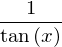

In [28]:
simplify(cos(x)/sin(x))

### apart and together

To manipulate symbolic expressions of fractions, we can use the `apart` and `together` functions:

In [29]:
f1 = 1/((a+1)*(a+2))

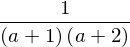

In [30]:
f1

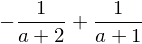

In [31]:
apart(f1)

In [32]:
f2 = 1/(a+2) + 1/(a+3)

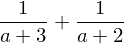

In [33]:
f2

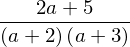

In [34]:
together(f2)

Simplify usually combines fractions but does not factor:

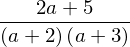

In [35]:
simplify(f2)

## Calculus

In addition to algebraic manipulations, the other main use of CAS is to do calculus, like derivatives and integrals of algebraic expressions

### Differentiation

Differentiation is usually simple. Use the `diff` function. The first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative

In [36]:
y = (x + pi)**4

In [37]:
diff(y, x)

For higher order derivatives we can do:

In [38]:
diff(y, x, x)

In [39]:
diff(y, x, x) # Same as above

To calculate the derivative of multivariate expressions, we can do:

In [40]:
x, y, z = symbols("x, y, z")

In [41]:
f = sin(x * y) + cos(y * z)

To perform $\frac{d^3f}{dxdy^2}$

In [42]:
diff(f, x, 1, y, 2)

## Integration

Integration is done in a similar fashion

In [43]:
f

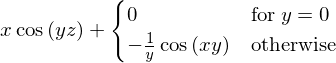

In [44]:
integrate(f, x)

By providing limits for the integration variable we can evaluate definite integrals:

In [45]:
integrate(f, (x, -1, 1))

and also improper integrals

In [46]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for infinity

## Sums and products

We can evaluate sums and products using the functions: `Sum`

In [47]:
n = Symbol("n")

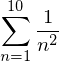

In [48]:
Sum(1/n**2, (n, 1, 10))

In [49]:
Sum(1/n**2, (n,1, 10)).evalf()

In [50]:
Sum(1/n**2, (n, 1, oo)).evalf()

Products work much the same way:

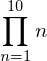

In [51]:
Product(n, (n, 1, 10)) # 10!

## Limits

Limits can be evaluated using the `limit` function. For example:

In [52]:
limit(sin(x)/x, x, 0)

We can use `limit` to check the result of derivation using the `diff` function:

In [53]:
f

In [54]:
diff(f, x)

In [55]:
h = Symbol("h")

In [56]:
limit((f.subs(x, x+h) - f)/h, h, 0)

We can change the direction from which we approach the limiting point using the `dir` keywork argument:

In [57]:
limit(1/x, x, 0, dir="+")

In [58]:
limit(1/x, x, 0, dir="-")

## Series

Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

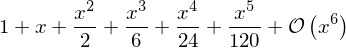

In [59]:
series(exp(x), x)

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

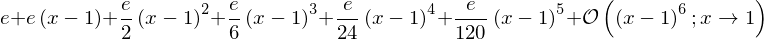

In [60]:
series(exp(x), x, 1)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different order:

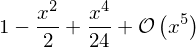

In [61]:
s1 = cos(x).series(x, 0, 5)
s1

In [62]:
s2 = sin(x).series(x, 0, 2)
s2

In [63]:
expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

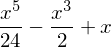

In [64]:
expand(s1.removeO() * s2.removeO())

But note that this is not the correct expansion of $\cos(x)\sin(x)$ to $5$th order:

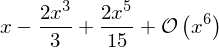

In [65]:
(cos(x)*sin(x)).series(x, 0, 6)

## Linear algebra

### Matrices

Matrices are defined using the Matrix class:

In [66]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

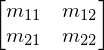

In [67]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [68]:
b = Matrix([[b1], [b2]])
b

With `Matrix` class instances we can do the usual matrix algebra operations:

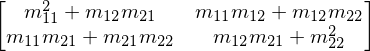

In [69]:
A**2

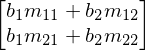

In [70]:
A*b

In [71]:
A.det()

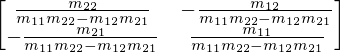

In [72]:
A.inv()

### Solving equations


For solving equations and systems of equations we can use the `solve` function:

In [73]:
solve(x**2 - 1, x)

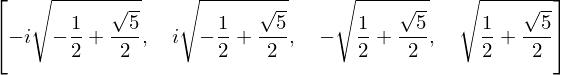

In [74]:
solve(x**4 - x**2 - 1, x)

Systems of equations:

In [75]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

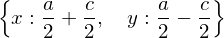

In [76]:
solve([x + y - a, x - y - c], [x,y])

***
Back to [index](index.ipynb) page